In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## Life Expectancy Dataset

Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that effect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.


## Problem

For this dataset, we will perform some exploratory data analysis and then build a simple classifier that will classify a sample (Country) as developed or developing

In [2]:
np.random.seed(42)

raw_data = pd.read_csv('Life Expectancy Data.csv')
df = pd.DataFrame(raw_data)

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Clean the data set (find and deal with missing values)

In [4]:
# Check the number of null values in each column
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [5]:
# Check what percentage of each column is made out of missing data
df.isnull().sum()/(df.notnull().sum()+df.isnull().sum())*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [6]:
# Now that we know which columns have the highest missing values we can drop them
df_clean1 = df.drop(columns = ['Hepatitis B','GDP','Population'],axis =0)

In [7]:
# We now drop the rows that have missing values
df_clean = df_clean1.dropna(axis = 0)

### Plot a scatter matrix of our dataset (removing the name of the country and year)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E14451AD90>,
      dtype=object)

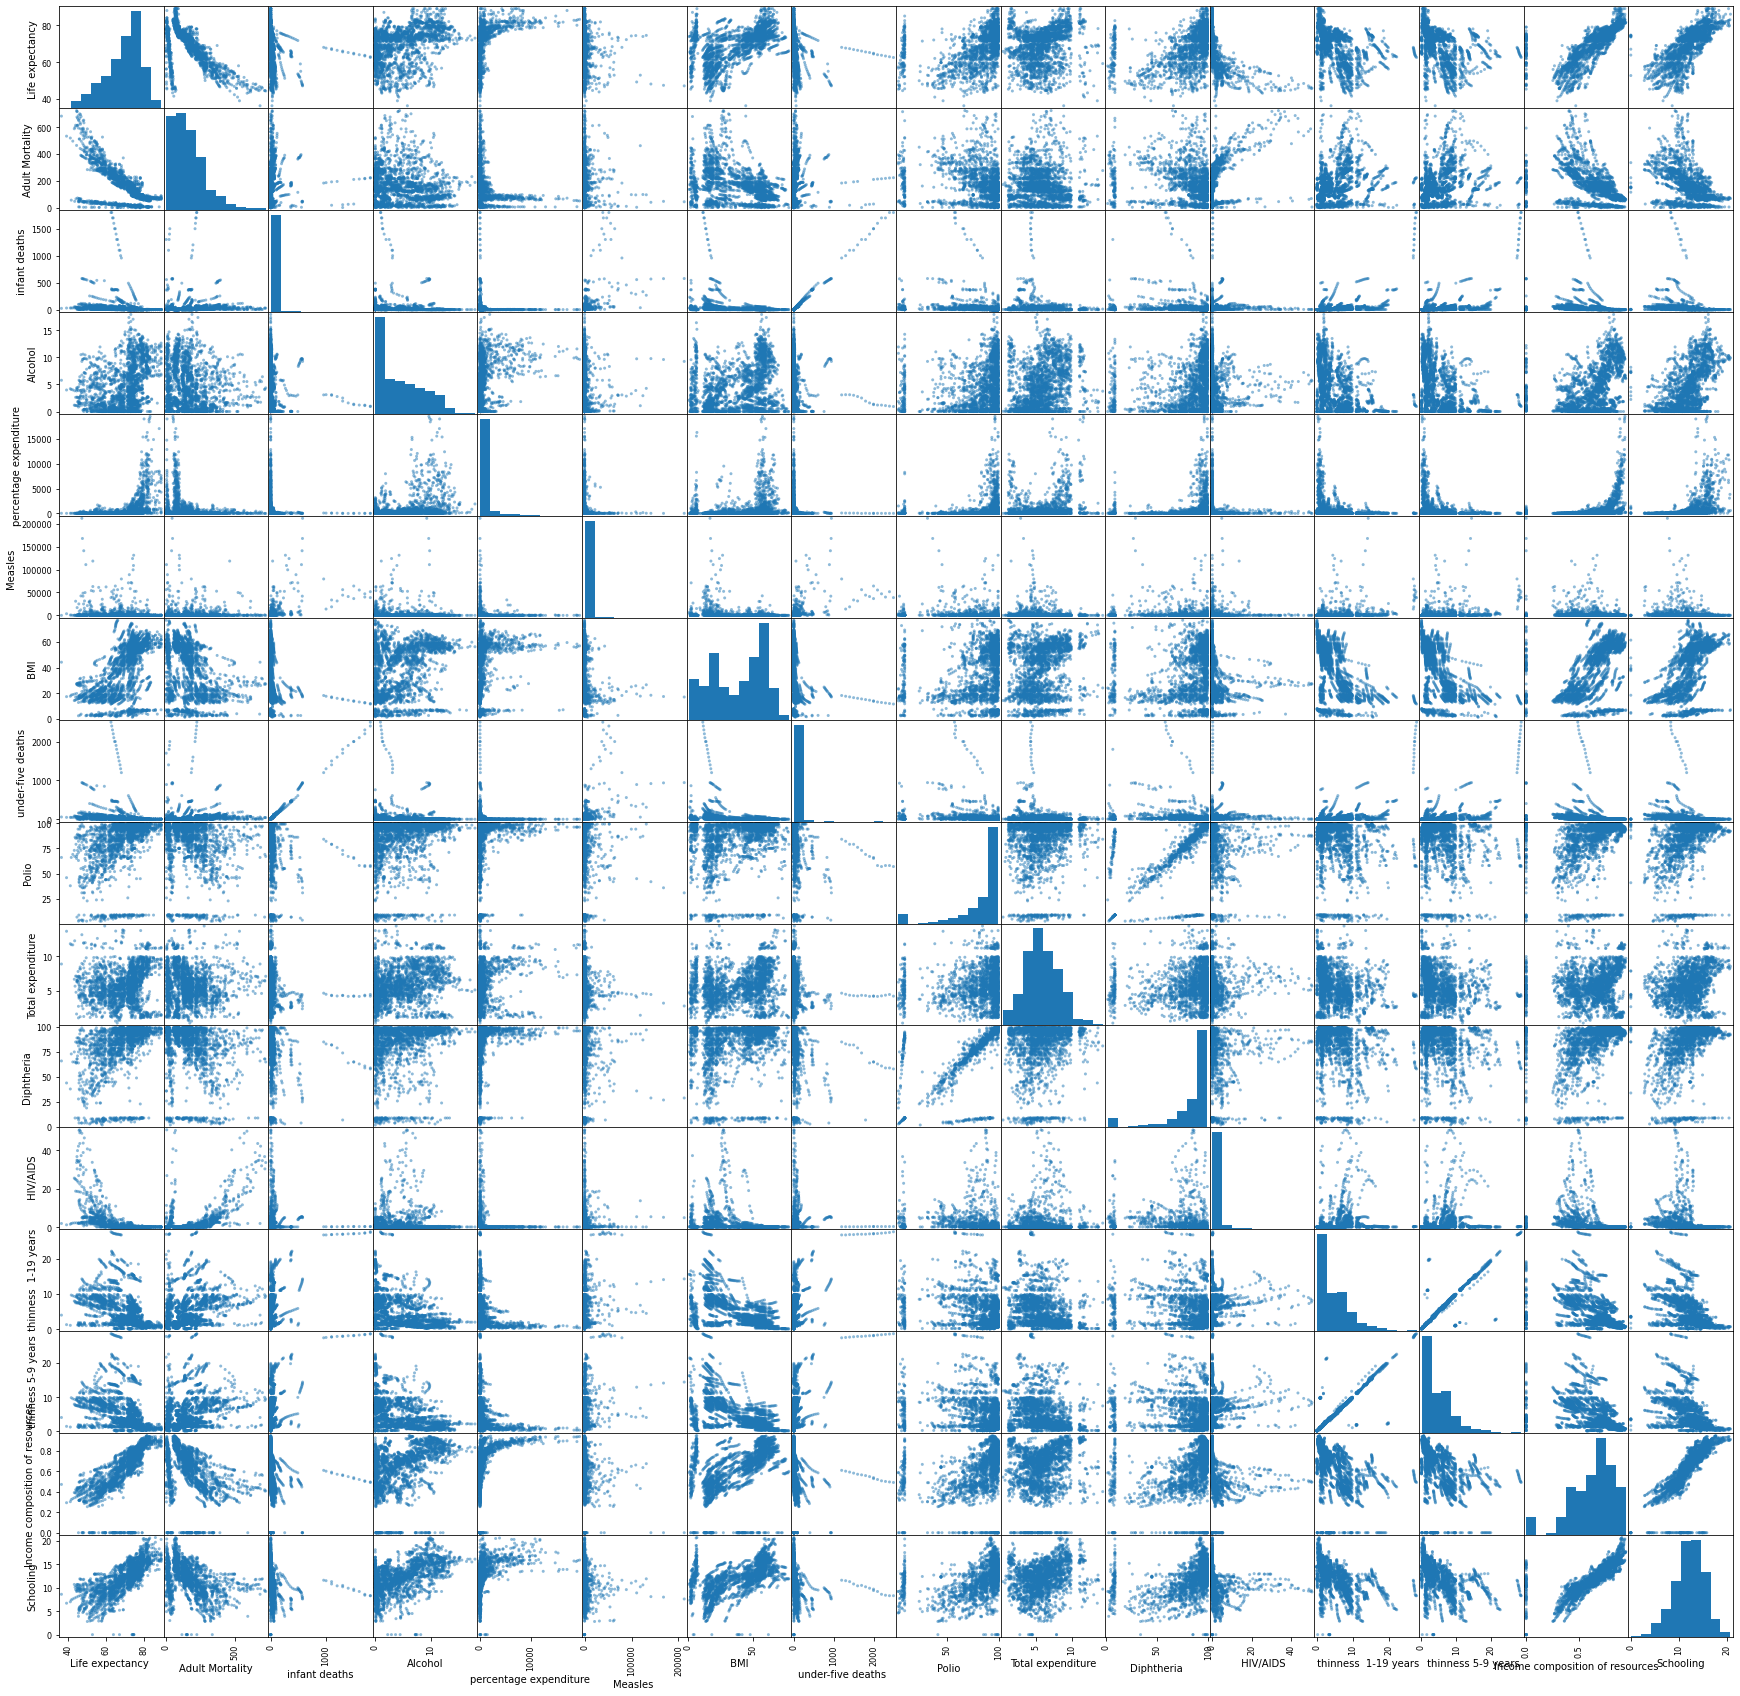

In [8]:
pd.plotting.scatter_matrix(df_clean.drop(columns = ['Country','Year']),figsize = (30,30))

### Plot a correlation matrix of our dataset (removing the name of the country and year)

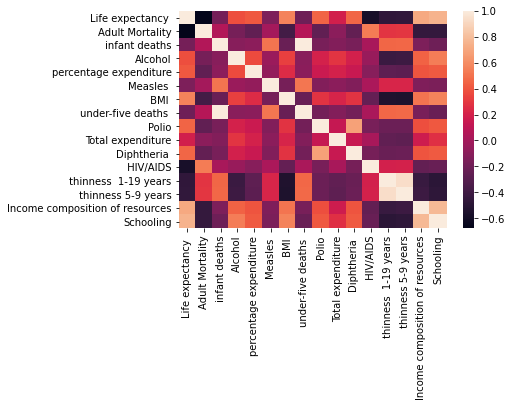

In [9]:
sns.heatmap(df_clean.drop(columns = ['Country','Year']).corr())

### Split our data into train, test and validation sets

In [10]:
from sklearn.model_selection import train_test_split

target_names = sorted(list(set(df_clean['Status'])))
targets = [target_names.index(status) for status in df_clean['Status']]

y = np.array(targets)
X = df_clean.drop(columns=['Country','Year','Status',
                          'under-five deaths ',' thinness 5-9 years']).values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify = y)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify = y_train)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standard = scaler.fit_transform(X_train)

### PCA Dimensionality reduction

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

X_red = pca.fit_transform(X_standard)

pca.explained_variance_ratio_.sum()

0.9335134164920896

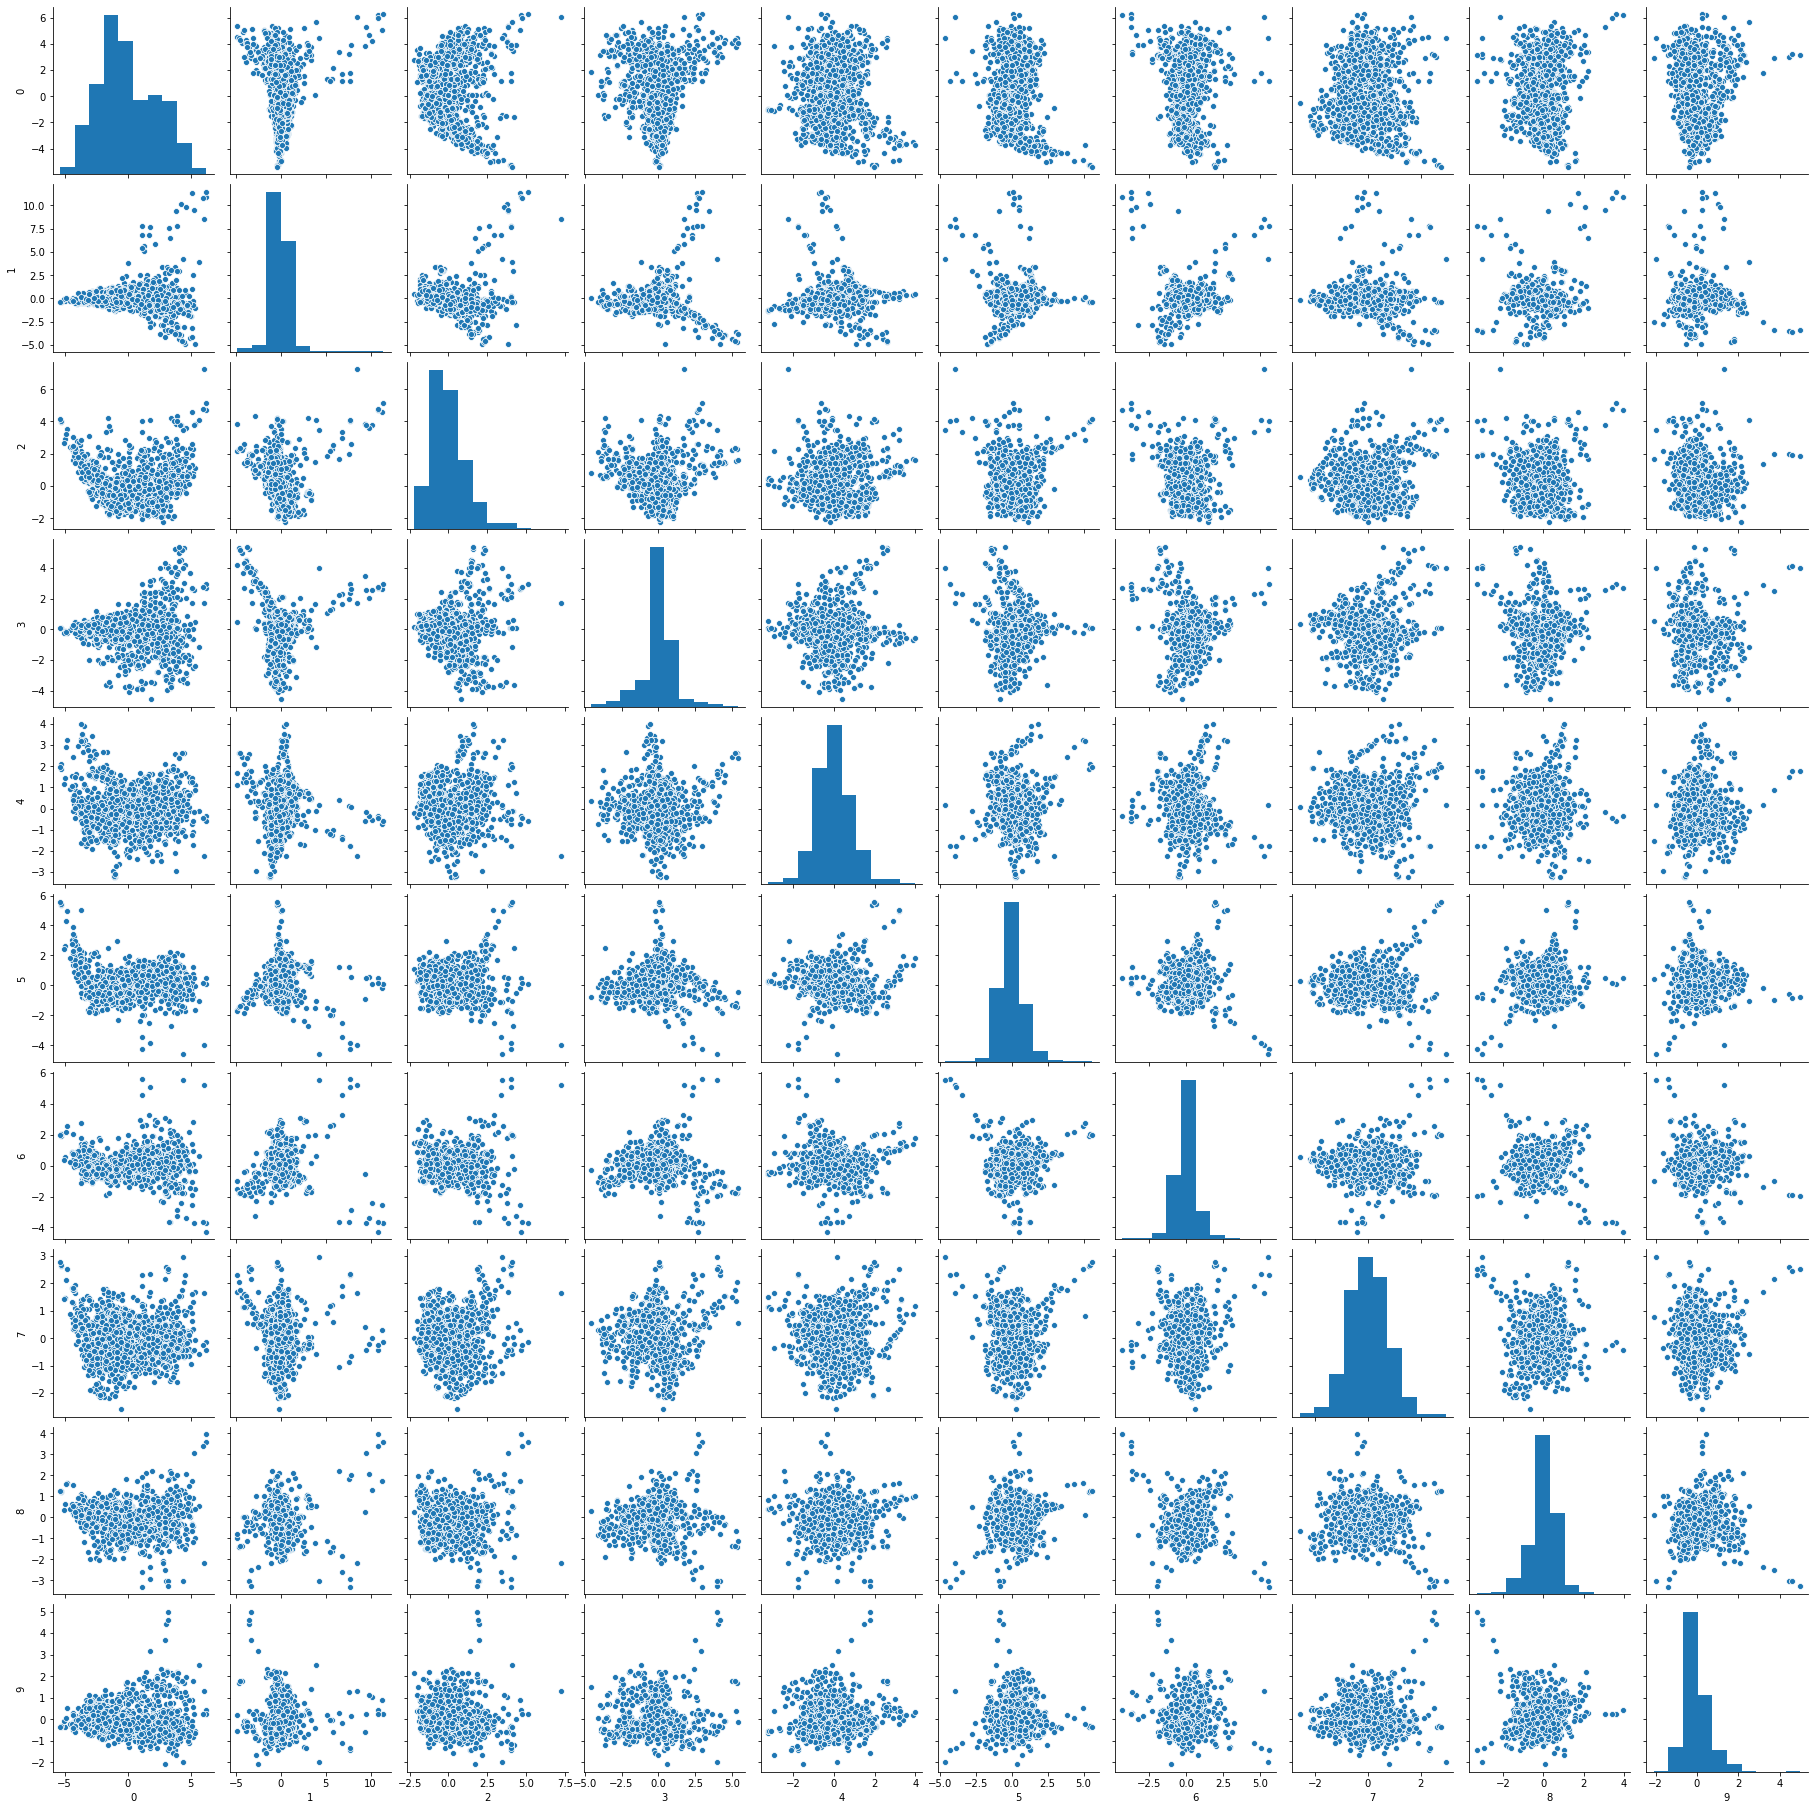

In [13]:
sns.pairplot(pd.DataFrame(X_red))

### Train a logistic regression model

In [25]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(penalty = 'l2', C = 0.5, random_state=42)
lr_clf.fit(X_red,y_train)

LogisticRegression(C=0.5, random_state=42)

### Obtain predictions on train and validation sets

In [26]:
y_hat = lr_clf.predict(X_red)
y_predict = lr_clf.predict(pca.transform(scaler.transform(X_val)))

### Obtain performance metrics on both predictions

In [27]:
from sklearn.metrics import classification_report

# Performance metrics on training set
print(classification_report(y_train,y_hat))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       278
           1       0.96      0.96      0.96      1357

    accuracy                           0.94      1635
   macro avg       0.89      0.88      0.89      1635
weighted avg       0.94      0.94      0.94      1635



In [28]:
# Performance metrics on training set
print(classification_report(y_val,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        70
           1       0.97      0.96      0.97       339

    accuracy                           0.95       409
   macro avg       0.90      0.91      0.91       409
weighted avg       0.95      0.95      0.95       409



Surprisingly the performance on the validation set is better!!!